In [19]:
# 📌 Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [20]:
# 📌 Step 2: Load the CSV file
# Replace 'co2_emissions.csv' with your actual file name
df = pd.read_csv('/Users/taylorroberson4/Downloads/CO2_emission.csv')
print(df)

     Country Name country_code                      Region  \
0           Aruba          ABW   Latin America & Caribbean   
1     Afghanistan          AFG                  South Asia   
2          Angola          AGO          Sub-Saharan Africa   
3         Albania          ALB       Europe & Central Asia   
4         Andorra          AND       Europe & Central Asia   
..            ...          ...                         ...   
210         Samoa          WSM         East Asia & Pacific   
211   Yemen, Rep.          YEM  Middle East & North Africa   
212  South Africa          ZAF          Sub-Saharan Africa   
213        Zambia          ZMB          Sub-Saharan Africa   
214      Zimbabwe          ZWE          Sub-Saharan Africa   

                             Indicator Name      1990      1991      1992  \
0    CO2 emissions (metric tons per capita)       NaN       NaN       NaN   
1    CO2 emissions (metric tons per capita)  0.191745  0.167682  0.095958   
2    CO2 emissions (metr

In [21]:
# 📌 Step 3: Select a country to analyze (example: 'United States')
country_name = 'United States'

# Extract the row for the selected country
country_data = df[df['Country Name'] == country_name]

# 📌 Step 4: Prepare the data for modeling
years = np.arange(1990, 2020)
emissions = country_data.loc[:, '1990':'2019'].values.flatten()
print(years.shape)
print(emissions.shape)


(30,)
(30,)


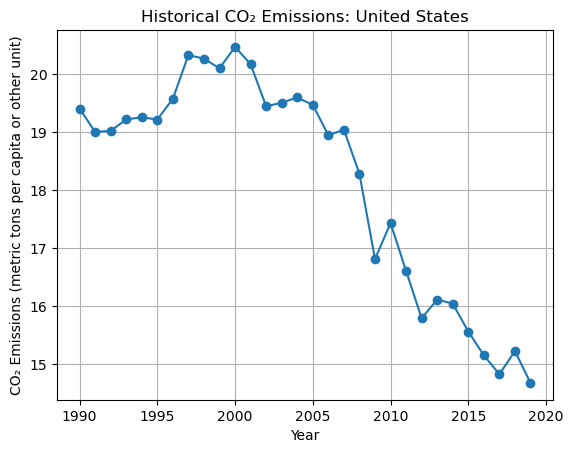

In [22]:
# 📌 Step 5: Visualize historical dataplt.figure(figsize=(10, 5))
plt.plot(years, emissions, marker='o')
plt.title(f'Historical CO₂ Emissions: {country_name}')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (metric tons per capita or other unit)')
plt.grid(True)
plt.show()

In [23]:
# 📌 Step 6: Prepare data for Linear Regression
X = years.reshape(-1, 1)
y = emissions

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# 📌 Step 7: Predict emissions for the next 20 years (2020–2039)
future_years = np.arange(2020, 2040)
future_emissions = model.predict(future_years.reshape(-1, 1))

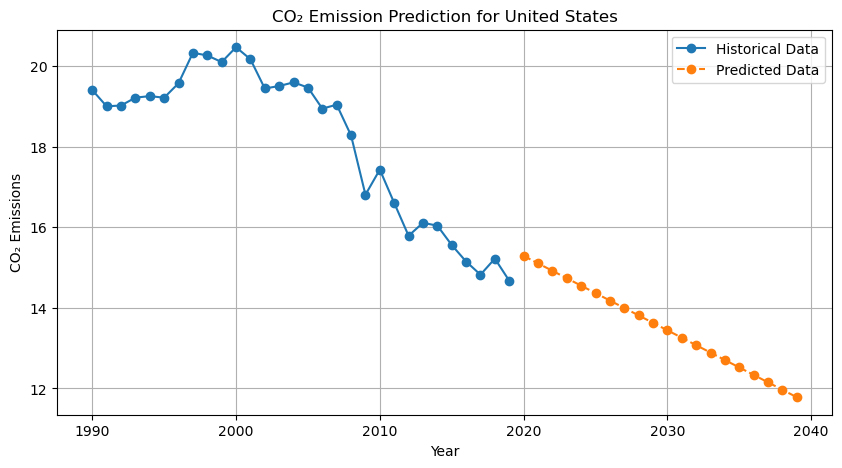

    Year  Predicted CO₂ Emissions
0   2020                15.289685
1   2021                15.105059
2   2022                14.920432
3   2023                14.735805
4   2024                14.551178
5   2025                14.366552
6   2026                14.181925
7   2027                13.997298
8   2028                13.812671
9   2029                13.628044
10  2030                13.443418
11  2031                13.258791
12  2032                13.074164
13  2033                12.889537
14  2034                12.704911
15  2035                12.520284
16  2036                12.335657
17  2037                12.151030
18  2038                11.966403
19  2039                11.781777


In [24]:
# 📌 Step 8: Visualize both historical and predicted emissions
plt.figure(figsize=(10, 5))
plt.plot(years, emissions, label='Historical Data', marker='o')
plt.plot(future_years, future_emissions, label='Predicted Data', marker='o', linestyle='dashed')
plt.title(f'CO₂ Emission Prediction for {country_name}')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Step 9: Combine and display predictions
future_data = pd.DataFrame({
    'Year': future_years,
    'Predicted CO₂ Emissions': future_emissions
})

print(future_data)

In [25]:
# 📌 Step 2: Load the CSV file
# Replace with your actual file name
df2 = pd.read_csv('/Users/taylorroberson4/Downloads/GlobalLandTemperaturesByCountry.csv')
print(df2)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457      5/1/13              19.059                          1.022   
577458      6/1/13              17.613                          0.473   
577459      7/1/13              17.000                          0.453   
577460      8/1/13              19.759                          0.717   
577461      9/1/13                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...      

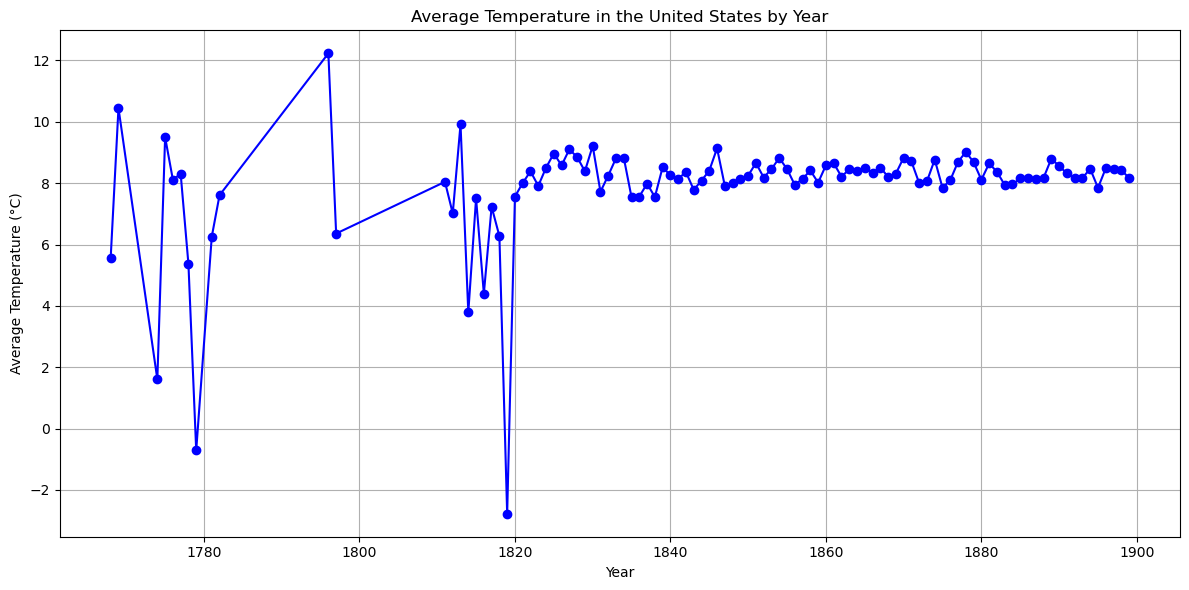

In [58]:
#df2 = pd.DataFrame(df)
#Changing Format of dt- creating column for year
df2['dt']=pd.to_datetime(df2['dt'],errors='coerce')
df2=df2.dropna(subset=['dt'])
df2['year']=df2['dt'].dt.year

# 📌 Filter data for years between 1973 and 2013
filtered_df2 = df2[(df2['year'] >= 1973) & (df2['year'] <= 2013)]

# 📌 Group by Year and Country (if needed — in this case, only USA)
#grouped_df2=filtered_df2.groupby(['AverageTemperature'].mean().reset_index())

# 📌 Select a country to analyze (example: 'United States')
country_name = 'United States'

# Extract the row for the selected country
country_data = df2[df2['Country'] == country_name]

# 📌 Step 4: Prepare the data for modeling
years = sorted(country_data['year'].unique())
#average_temps=[country_data[country_data['year']==year]['AverageTemperature'].mean() for year in years]
#average_temperature = country_data.loc[:,'1973:2013'].values.flatten()
#print(years.shape)
#print(average_temperature.shape)
# Calculate the mean temperature for each unique year
average_temps = []
valid_years = []

for year in years:
    avg_temp = country_data[country_data['year'] == year]['AverageTemperature'].mean()
    if pd.notna(avg_temp):  # Only keep years with valid average temperatures
        average_temps.append(avg_temp)
        valid_years.append(year)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(valid_years, average_temps, color='blue', marker='o')
plt.title('Average Temperature in the United States by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 Plot Temperature by Year for each Country
#plt.figure(figsize=(10,6))
#plt.plot(years,grouped_df2,color='green',marker='o')
#plt.title('Temperature by Year')
#plt.xlabel('year')
#plt.ylabel('AverageTemperature (°C)')
#plt.legend()
#plt.grid(True)
#plt.show()

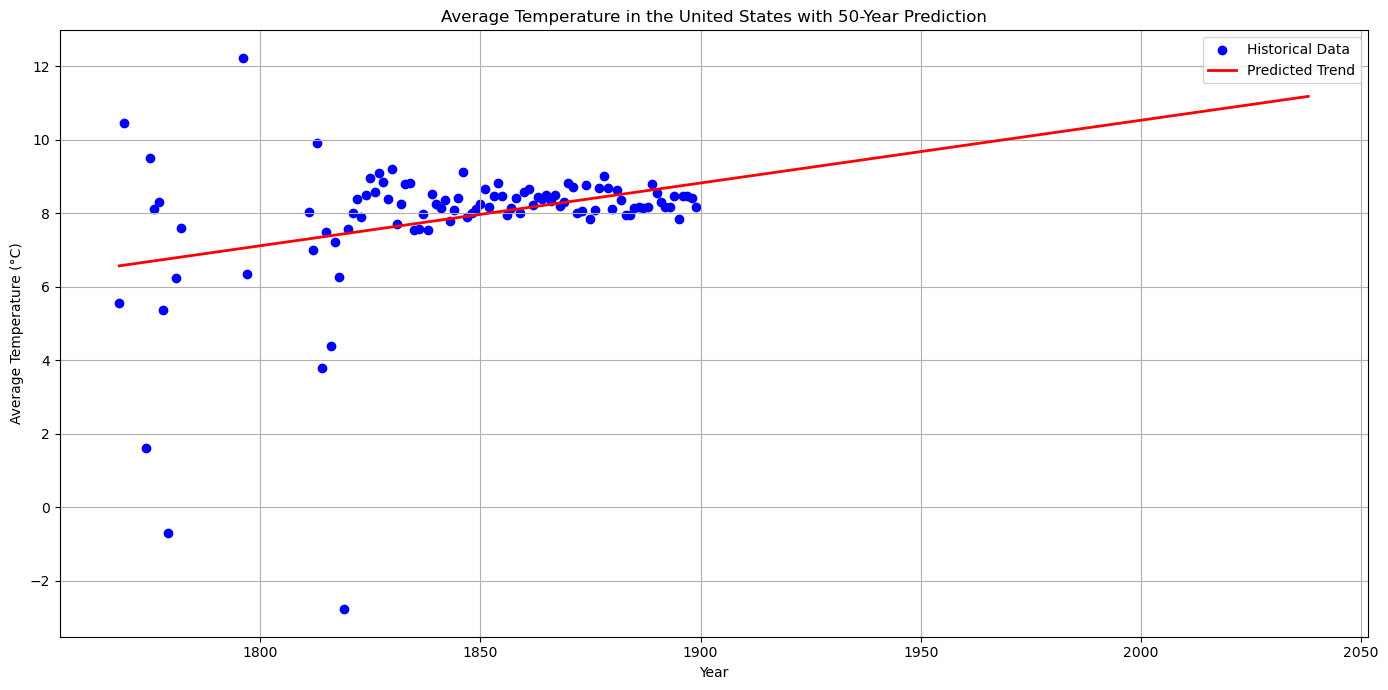

In [64]:
# Filter for United States
us_df = df2[df2['Country'] == 'United States']

# Group by year and compute the mean temperature
yearly_avg_temp = us_df.groupby('year')['AverageTemperature'].mean().dropna()

# Prepare data for the model
X = yearly_avg_temp.index.values.reshape(-1, 1)   # Features (years)
y = yearly_avg_temp.values                        # Target (average temps)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict temperatures for the next 50 years
future_years = np.arange(X.min(), X.max() + 140).reshape(-1, 1)
predicted_temps = model.predict(future_years)

# Plot the historical data and predictions
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(future_years, predicted_temps, color='red', linewidth=2, label='Predicted Trend')
plt.title('Average Temperature in the United States with 50-Year Prediction')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()